In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output directories
figures_dir = "./Figures/n480/"
os.makedirs(figures_dir, exist_ok=True)

# Define simulation files for n480
temperature_files = {
    1.5: "kalj_T1.5_n480_v400_prod_10000_1",
    1.0: "kalj_T1_n480_v400_prod_50000_1",
    0.9: "kalj_T0.9_n480_v400_prod_150000_1",
    0.8: "kalj_T0.8_n480_v400_prod_150000_1",
    0.7: "kalj_T0.7_n480_v400_prod_180000_1",
    0.65: "kalj_T0.65_n480_v400_prod_350000_1",
    0.6: "kalj_T0.6_n480_v400_prod_1000000_1",
    0.55: "kalj_T0.55_n480_v400_prod_3000000_1",
    0.5: "kalj_T0.5_n480_v400_prod_10000000_1",
}

# Target MSD value to find time
target_msd = 1

# Containers for MSD results
msd1_times = []  # Time where MSD = 1
valid_temperatures = []  # Corresponding temperatures

# Compute MSD for type 1 particles
for T, filename in temperature_files.items():
    try:
        # Load the Universe
        universe = mda.Universe(
            f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/{filename}.lammpstrj",
            f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/production/{filename}.unwrap.dcd",
            topology_format="LAMMPSDUMP"
        )
        type1 = universe.select_atoms("type 1")

        # Initialize MSD computation
        n_frames = len(universe.trajectory)
        msd = np.zeros(n_frames)
        time = np.arange(n_frames) * universe.trajectory.dt

        # Reference positions
        initial_positions = type1.positions.copy()

        for ts in universe.trajectory:
            displacements = type1.positions - initial_positions
            squared_displacements = np.sum(displacements ** 2, axis=1)
            msd[ts.frame] = np.mean(squared_displacements)

        # Save MSD results
        plt.figure()
        plt.loglog(time, msd, label=f"T={T}")
        plt.xlabel("Time (log scale)")
        plt.ylabel("MSD (log scale)")
        plt.title(f"MSD for Type 1 Particles at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/MSD_T{T}.png")
        plt.close()

        # Find time where MSD = 1
        time_msd1 = time[np.where(msd >= target_msd)[0][0]]
        msd1_times.append(time_msd1)
        valid_temperatures.append(T)

    except Exception as e:
        print(f"Error processing temperature {T}: {e}")
        continue

# Plot Time at MSD=1 vs 1/T
inverse_temperatures = 1 / np.array(valid_temperatures)
plt.figure()
plt.loglog(inverse_temperatures, msd1_times, marker='o')
plt.xlabel("1/T (log scale)")
plt.ylabel("Time at MSD=1 (log scale)")
plt.title("Time at MSD=1 vs 1/Temperature")
plt.savefig(f"{figures_dir}/Time_at_MSD_1_vs_1_over_T.png")
plt.close()

# Compute RDF for Type 1-1, Type 2-2, and Type 1-2
from MDAnalysis.analysis.rdf import InterRDF

for T, filename in temperature_files.items():
    try:
        # Load the Universe
        universe = mda.Universe(
            f"./Data/equil/{filename}.lammpstrj",
            f"./Data/prod/{filename}.unwrap.dcd",
            topology_format="LAMMPSDUMP"
        )

        # Compute RDF for different particle types
        rdf_11 = InterRDF(universe.select_atoms("type 1"), universe.select_atoms("type 1"))
        rdf_22 = InterRDF(universe.select_atoms("type 2"), universe.select_atoms("type 2"))
        rdf_12 = InterRDF(universe.select_atoms("type 1"), universe.select_atoms("type 2"))

        rdf_11.run()
        rdf_22.run()
        rdf_12.run()

        # Plot RDF for each pair
        plt.figure()
        plt.plot(rdf_11.bins, rdf_11.rdf, label="g_11(r)")
        plt.plot(rdf_22.bins, rdf_22.rdf, label="g_22(r)")
        plt.plot(rdf_12.bins, rdf_12.rdf, label="g_12(r)")
        plt.xlabel("r (distance)")
        plt.ylabel("g(r)")
        plt.title(f"RDF at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/RDF_T{T}.png")
        plt.close()

    except Exception as e:
        print(f"Error computing RDF for temperature {T}: {e}")
        continue

Error processing temperature 1.5: [Errno 2] No such file or directory: '/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/kalj_T1.5_n480_v400_prod_10000_1.lammpstrj'
Error processing temperature 1.0: [Errno 2] No such file or directory: '/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/kalj_T1_n480_v400_prod_50000_1.lammpstrj'
Error processing temperature 0.9: [Errno 2] No such file or directory: '/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/kalj_T0.9_n480_v400_prod_150000_1.lammpstrj'
Error processing temperature 0.8: [Errno 2] No such file or directory: '/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/kalj_T0.8_n480_v400_prod_150000_1.lammpstrj'
Error processing temperature 0.7: [Errno 2] No such file or directory: '/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/equilbrium/kalj_T0.7_n480_v400_prod_180000_1.lammpstrj'
Error pro

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


MSD did not reach 1 at temperature 1.5


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


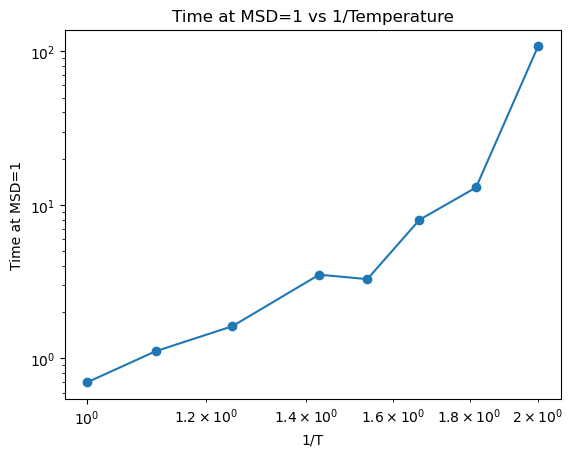

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os
from MDAnalysis.analysis.rdf import InterRDF

# Create output directory for figures
figures_dir = "./Figures/n480/"
os.makedirs(figures_dir, exist_ok=True)

# Define the temperature files for n480
temperature_files = {
    1.5: "kalj_T1.5_n480_v400_prod_10000_1",
    1.0: "kalj_T1_n480_v400_prod_50000_1",
    0.9: "kalj_T0.9_n480_v400_prod_150000_1",
    0.8: "kalj_T0.8_n480_v400_prod_150000_1",
    0.7: "kalj_T0.7_n480_v400_prod_180000_1",
    0.65: "kalj_T0.65_n480_v400_prod_350000_1",
    0.6: "kalj_T0.6_n480_v400_prod_1000000_1",
    0.55: "kalj_T0.55_n480_v400_prod_3000000_1",
    0.5: "kalj_T0.5_n480_v400_prod_10000000_1",
}

# Target MSD value
target_msd = 1

# Containers for results
msd1_times = []  # Times where MSD = 1
valid_temperatures = []  # Corresponding temperatures

# Compute MSD and RDF for each temperature
for T, filename in temperature_files.items():
    try:
        # File paths
        equil_file = f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/Equilibrium/{filename.replace('_prod_', '_')}.lammpstrj"
        prod_file = f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/Production/{filename}.unwrap.dcd"

        # Load the Universe
        universe = mda.Universe(equil_file, prod_file, topology_format="LAMMPSDUMP")
        type1 = universe.select_atoms("type 1")
        type2 = universe.select_atoms("type 2")

        # Compute MSD
        n_frames = len(universe.trajectory)
        msd = np.zeros(n_frames)
        time = np.arange(n_frames) * universe.trajectory.dt

        initial_positions = type1.positions.copy()  # Reference positions

        for ts in universe.trajectory:
            displacements = type1.positions - initial_positions
            squared_displacements = np.sum(displacements ** 2, axis=1)
            msd[ts.frame] = np.mean(squared_displacements)

        # Plot MSD
        plt.figure()
        plt.loglog(time, msd, label=f"T={T}")
        plt.xlabel("Time (log scale)")
        plt.ylabel("MSD (log scale)")
        plt.title(f"MSD for Type 1 Particles at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/MSD_T{T}.png")
        plt.close()

               # Find time where MSD = 1
        indices = np.where(msd >= target_msd)[0]
        if len(indices) > 0:
            time_msd1 = time[indices[0]]
            msd1_times.append(time_msd1)
            valid_temperatures.append(T)
        else:
            print(f"MSD did not reach {target_msd} at temperature {T}")

        # Compute RDF
        rdf_11 = InterRDF(type1, type1)
        rdf_22 = InterRDF(type2, type2)
        rdf_12 = InterRDF(type1, type2)

        rdf_11.run()
        rdf_22.run()
        rdf_12.run()

        # Plot RDF
        plt.figure()
        plt.plot(rdf_11.bins, rdf_11.rdf, label="g_11(r)")
        plt.plot(rdf_22.bins, rdf_22.rdf, label="g_22(r)")
        plt.plot(rdf_12.bins, rdf_12.rdf, label="g_12(r)")
        plt.xlabel("r (distance)")
        plt.ylabel("g(r)")
        plt.title(f"RDF at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/RDF_T{T}.png")
        plt.close()

    except Exception as e:
        print(f"Error processing temperature {T}: {e}")
        continue

# Plot Time at MSD=1 vs 1/T
inverse_temperatures = 1 / np.array(valid_temperatures)
plt.figure()
plt.loglog(inverse_temperatures, msd1_times, marker='o')
plt.xlabel("1/T")
plt.ylabel("Time at MSD=1")
plt.title("Time at MSD=1 vs 1/Temperature")
plt.savefig(f"{figures_dir}/Time_at_MSD_1_vs_1_over_T.png")
plt.show()

MSD did not reach 1 at temperature 1.5


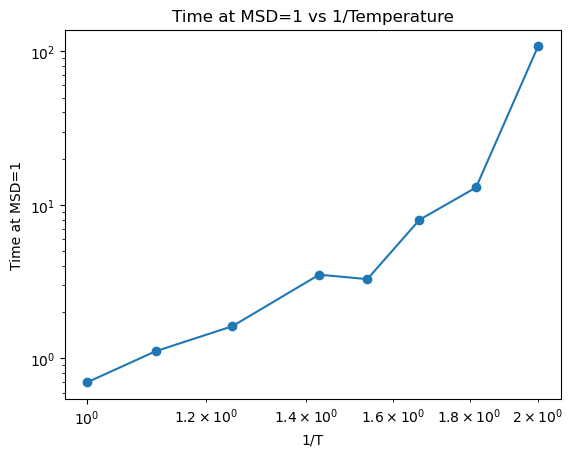

In [5]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os
from MDAnalysis.analysis.rdf import InterRDF

# Create output directory for figures
figures_dir = "./Figures/n480/"
os.makedirs(figures_dir, exist_ok=True)

# Define the temperature files for n480
temperature_files = {
    1.5: "kalj_T1.5_n480_v400_prod_10000_1",
    1.0: "kalj_T1_n480_v400_prod_50000_1",
    0.9: "kalj_T0.9_n480_v400_prod_150000_1",
    0.8: "kalj_T0.8_n480_v400_prod_150000_1",
    0.7: "kalj_T0.7_n480_v400_prod_180000_1",
    0.65: "kalj_T0.65_n480_v400_prod_350000_1",
    0.6: "kalj_T0.6_n480_v400_prod_1000000_1",
    0.55: "kalj_T0.55_n480_v400_prod_3000000_1",
    0.5: "kalj_T0.5_n480_v400_prod_10000000_1",
}

# Target MSD value
target_msd = 1

# Containers for results
msd1_times = []  # Times where MSD = 1
valid_temperatures = []  # Corresponding temperatures

# Compute MSD and RDF for each temperature
for T, filename in temperature_files.items():
    try:
        # File paths
        equil_file = f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/Equilibrium/{filename.replace('_prod_', '_')}.lammpstrj"
        prod_file = f"/home/ndv3235/comp-lab-class-2024/Week9-LAMMPS-SupercooledLiquids/Data/Production/{filename}.unwrap.dcd"

        # Load the Universe
        universe = mda.Universe(equil_file, prod_file, topology_format="LAMMPSDUMP")
        type1 = universe.select_atoms("type 1")
        type2 = universe.select_atoms("type 2")

        # Compute MSD
        n_frames = len(universe.trajectory)
        msd = np.zeros(n_frames)
        time = np.arange(n_frames) * universe.trajectory.dt

        initial_positions = type1.positions.copy()  # Reference positions

        for ts in universe.trajectory:
            displacements = type1.positions - initial_positions
            squared_displacements = np.sum(displacements ** 2, axis=1)
            msd[ts.frame] = np.mean(squared_displacements)

        # Plot MSD
        plt.figure()
        plt.loglog(time, msd, label=f"T={T}")
        plt.xlabel("Time (log scale)")
        plt.ylabel("MSD (log scale)")
        plt.title(f"MSD for Type 1 Particles at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/MSD_T{T}.png")
        plt.close()

        # Find time where MSD = 1
        indices = np.where(msd >= target_msd)[0]
        if len(indices) > 0:
            time_msd1 = time[indices[0]]
            msd1_times.append(time_msd1)
            valid_temperatures.append(T)
        else:
            print(f"MSD did not reach {target_msd} at temperature {T}")

        # Compute RDF
        rdf_11 = InterRDF(type1, type1)
        rdf_22 = InterRDF(type2, type2)
        rdf_12 = InterRDF(type1, type2)

        rdf_11.run()
        rdf_22.run()
        rdf_12.run()

        # Plot RDF
        plt.figure()
        plt.plot(rdf_11.results.bins, rdf_11.results.rdf, label="g_11(r)")
        plt.plot(rdf_22.results.bins, rdf_22.results.rdf, label="g_22(r)")
        plt.plot(rdf_12.results.bins, rdf_12.results.rdf, label="g_12(r)")
        plt.xlabel("r (distance)")
        plt.ylabel("g(r)")
        plt.title(f"RDF at T={T}")
        plt.legend()
        plt.savefig(f"{figures_dir}/RDF_T{T}.png")
        plt.close()

    except Exception as e:
        print(f"Error processing temperature {T}: {e}")
        continue

# Plot Time at MSD=1 vs 1/T
inverse_temperatures = 1 / np.array(valid_temperatures)
plt.figure()
plt.loglog(inverse_temperatures, msd1_times, marker='o')
plt.xlabel("1/T")
plt.ylabel("Time at MSD=1")
plt.title("Time at MSD=1 vs 1/Temperature")
plt.savefig(f"{figures_dir}/Time_at_MSD_1_vs_1_over_T.png")
plt.show()